In [449]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
from plotly.validators.bar import marker
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import  itertools

sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [450]:
scaler = MinMaxScaler()

with open("../code/btree/build/Release/output.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
btree_df['Page'] = btree_df['Page'].astype(int)

btree_df['RAM'] = btree_df['RAM'] + btree_df['Page']


for i in range(btree_df.size):
  btree_df['b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])


btree_df['cpu_time_ms_norm'] = scaler.fit_transform(btree_df[['cpu_time_ms']])
btree_df['RAM_norm'] = scaler.fit_transform(btree_df[['RAM']])
btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])




btree_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,Page,RAM,real_time_ms,cpu_time_ms,b,cpu_time_ms_norm,RAM_norm,Page_norm
0,BM_MapInsertion<2>/20000000,0,0,BM_MapInsertion<2>/20000000,iteration,1,0,1,1,1.072065e+14,5.935938e+10,ns,1294456,2544788,1.072065e+08,59359.375,2,0.000000,1.000000,1.000000
1,BM_MapInsertion<4>/20000000,1,0,BM_MapInsertion<4>/20000000,iteration,1,0,1,1,1.072346e+14,8.696875e+10,ns,539168,1063908,1.072346e+08,86968.750,4,0.170791,0.355621,0.355545
2,BM_MapInsertion<6>/20000000,2,0,BM_MapInsertion<6>/20000000,iteration,1,0,1,1,1.072546e+14,1.064844e+11,ns,375208,740108,1.072546e+08,106484.375,6,0.291514,0.214726,0.215645
3,BM_MapInsertion<8>/20000000,3,0,BM_MapInsertion<8>/20000000,iteration,1,0,1,1,1.072719e+14,1.232656e+11,ns,302968,596900,1.072719e+08,123265.625,8,0.395322,0.152411,0.154006
4,BM_MapInsertion<16>/20000000,4,0,BM_MapInsertion<16>/20000000,iteration,1,0,1,1,1.072842e+14,1.351562e+11,ns,202252,400248,1.072842e+08,135156.250,16,0.468877,0.066842,0.068069
5,BM_MapInsertion<32>/20000000,5,0,BM_MapInsertion<32>/20000000,iteration,1,0,1,1,1.072938e+14,1.446406e+11,ns,156320,309792,1.072938e+08,144640.625,32,0.527547,0.027481,0.028878
6,BM_MapInsertion<64>/20000000,6,0,BM_MapInsertion<64>/20000000,iteration,1,0,1,1,1.073031e+14,1.537500e+11,ns,135372,268680,1.073031e+08,153750.000,64,0.583897,0.009592,0.011004
7,BM_MapInsertion<128>/20000000,7,0,BM_MapInsertion<128>/20000000,iteration,1,0,1,1,1.073130e+14,1.633125e+11,ns,129468,256996,1.073130e+08,163312.500,128,0.643050,0.004508,0.005966
8,BM_MapInsertion<256>/20000000,8,0,BM_MapInsertion<256>/20000000,iteration,1,0,1,1,1.073239e+14,1.740625e+11,ns,135368,267676,1.073239e+08,174062.500,256,0.709550,0.009155,0.011000
9,BM_MapInsertion<512>/20000000,9,0,BM_MapInsertion<512>/20000000,iteration,1,0,1,1,1.073361e+14,1.860781e+11,ns,142356,280852,1.073361e+08,186078.125,512,0.783878,0.014888,0.016963


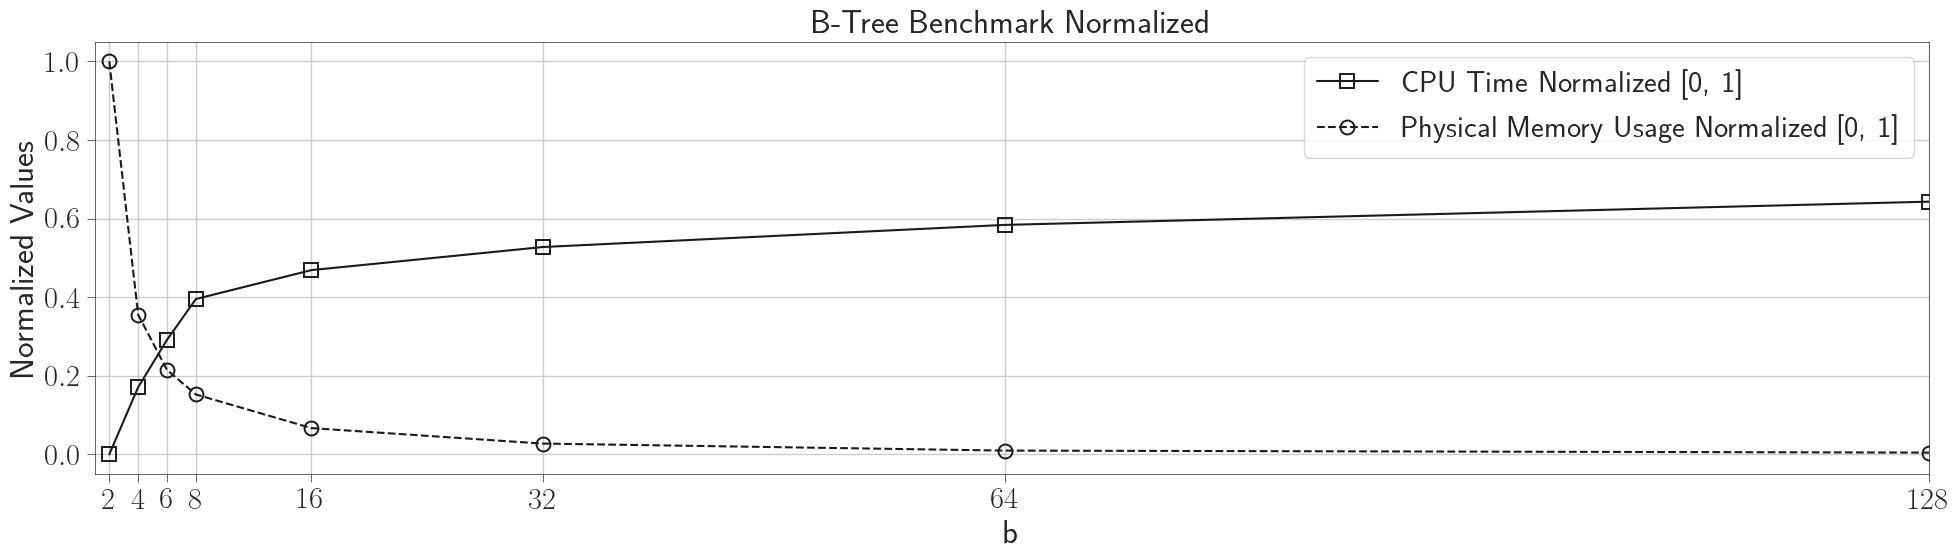

In [451]:
# Plot the data
f, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms_norm',
    marker='s',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='CPU Time Normalized [0, 1]',
    ax=ax
)

sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM_norm',
    marker='o',
    markerfacecolor='none',
    linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='Physical Memory Usage Normalized [0, 1]',
    ax=ax
)

ax.set_title("B-Tree Benchmark Normalized")
ax.set_xlabel('b')
ax.set_ylabel('Normalized Values')
ax.grid(True)
ax.legend()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks(btree_df['b'])

plt.xlim([1, 128])

plt.tight_layout()
plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()

In [452]:
"optimum b = " + str(btree_df.loc[np.argmin(np.abs(btree_df['RAM_norm'] - btree_df['cpu_time_ms_norm'])), 'b'])

'optimum b = 6'

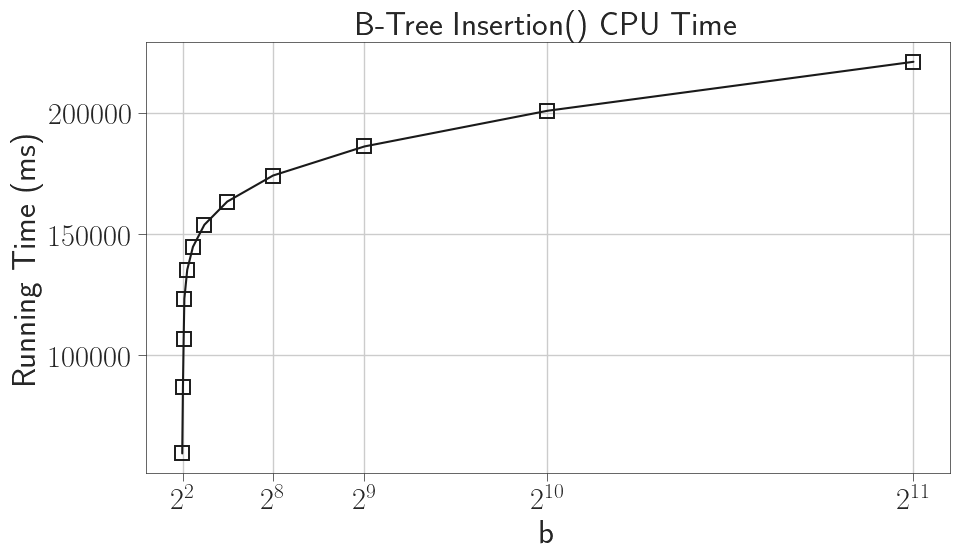

In [487]:
# Plot the data

from matplotlib.ticker import FuncFormatter

def log_tick_formatter(val, pos=None):
    return f'$2^{{{int(np.log2(val))}}}$'

f, ax = plt.subplots(figsize=(10, 6))


sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms',
    marker='s',
    markerfacecolor='none',
    # linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='ms',
    ax=ax
)

ax.set_title("B-Tree Insertion() CPU Time")
ax.set_xlabel('b')
ax.set_ylabel('Running Time (ms)')
ax.grid(True)
ax.legend().remove()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks( [2**2] + list(btree_df['b'])[8:])
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
# plt.xlim([1, 128.5])
# plt.ylim([0.5E5, 2.5E5])

plt.tight_layout()
plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()

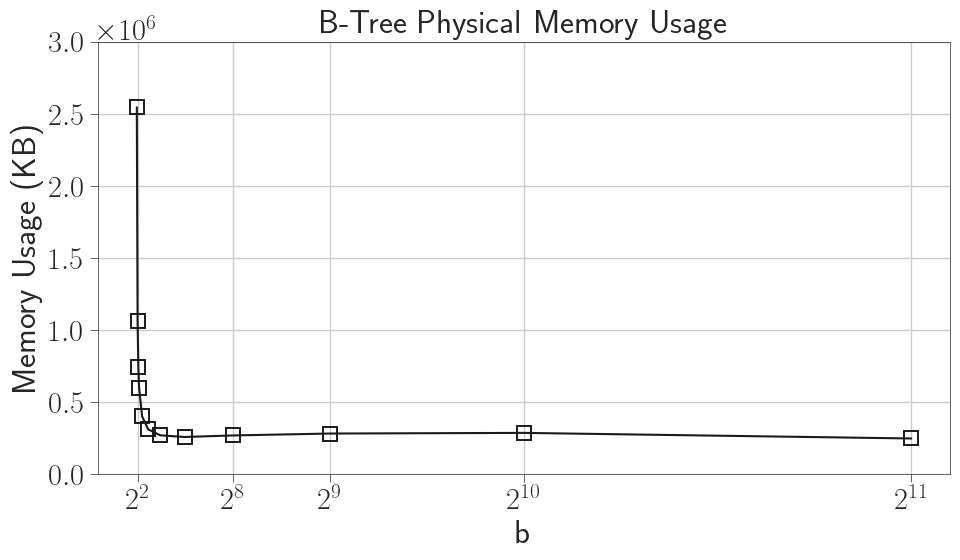

In [491]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 6))
min_value = btree_df['RAM'].min()


sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM',
    marker='s',
    markerfacecolor='none',
    # linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='KB',
    ax=ax
)

ax.set_title("B-Tree Physical Memory Usage")
ax.set_xlabel('b')
ax.set_ylabel('Memory Usage (KB)')
ax.grid(True)
ax.legend().remove()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks( [2**2] + list(btree_df['b'])[8:])
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

plt.ylim([0, 3E6])

plt.tight_layout()
plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()


Second part

In [444]:
with open("../code/btree/build/Release/output_over_n.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

# btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
# btree_df['Page'] = btree_df['Page'].astype(int)

btree_df['n'] = btree_df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
btree_df['b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)
btree_df['operation'] = btree_df['name'].apply(lambda x: x.split('_')[1].split('<')[0] if '_' in x else x)
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('_')[0].split('>')[0] if '_' in x else x)

# btree_df['cpu_time_ms_norm'] = (btree_df['cpu_time_ms'] - btree_df['cpu_time_ms'].min()) / (btree_df['cpu_time_ms'].max() - btree_df['cpu_time_ms'].min())
btree_df['RAM_norm'] = (btree_df['RAM'] - btree_df['RAM'].min()) / (btree_df['RAM'].max() - btree_df['RAM'].min())
# btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])

btree_df.drop(columns=['real_time', 'cpu_time','iterations', 'repetition_index', 'run_name', 'repetitions', 'threads', 'run_type', 'family_index', 'per_family_instance_index', 'time_unit', 'Page', 'real_time'], inplace=True)

btree_df.rename(columns={
    'cpu_time_ms_norm': 'CPU Time Normalized [0, 1]',
    'cpu_time_ms': 'CPU Time (ms)',
    'RAM': 'Physical Memory Usage (KB)',
    'RAM_norm': 'Physical Memory Usage Normalized [0, 1]',
}, inplace=True)

btree_df

,name,Physical Memory Usage (KB),CPU Time (ms),n,b,operation,"Physical Memory Usage Normalized [0, 1]"
0,OrderedMap,4,15.625,8,NaN,Insertion,0.017648
1,OrderedMap,0,15.625,16,NaN,Insertion,0.017646
2,OrderedMap,0,15.625,32,NaN,Insertion,0.017646
3,OrderedMap,0,15.625,64,NaN,Insertion,0.017646
4,OrderedMap,0,15.625,128,NaN,Insertion,0.017646
...,...,...,...,...,...,...,...
225,BTreeMap,46388,1643250.000,2097152,6.0,Search,0.039366
226,BTreeMap,93044,1648703.125,4194304,6.0,Search,0.061212
227,BTreeMap,185556,1662421.875,8388608,6.0,Search,0.104528
228,BTreeMap,240168,1696125.000,16777216,6.0,Search,0.130099


In [445]:
names = btree_df['name'].unique().tolist()
operations = btree_df['operation'].unique()


df_filtered_btree = btree_df[btree_df['name'] == 'BTreeMap']
df_filtered_map = btree_df[btree_df['name'] == 'OrderedMap']

exclude_columns = ['name', 'n', 'operation', 'b']

unique_names = btree_df['name'].unique().tolist()
print(unique_names)
print(operations)

['OrderedMap', 'BTreeMap']
['Insertion' 'Search']


bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


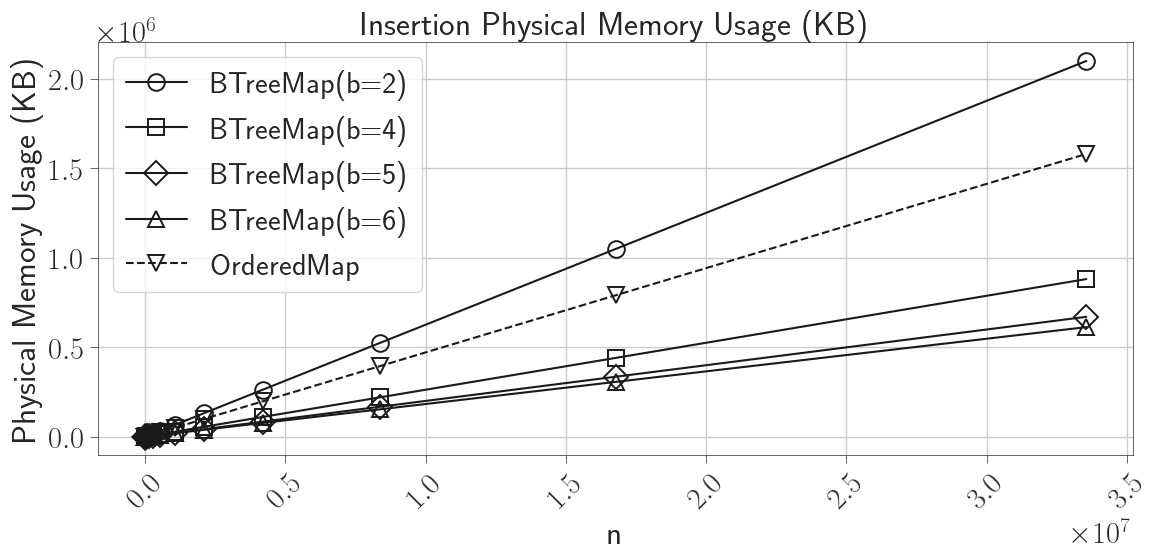

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
om CPU Time (ms)


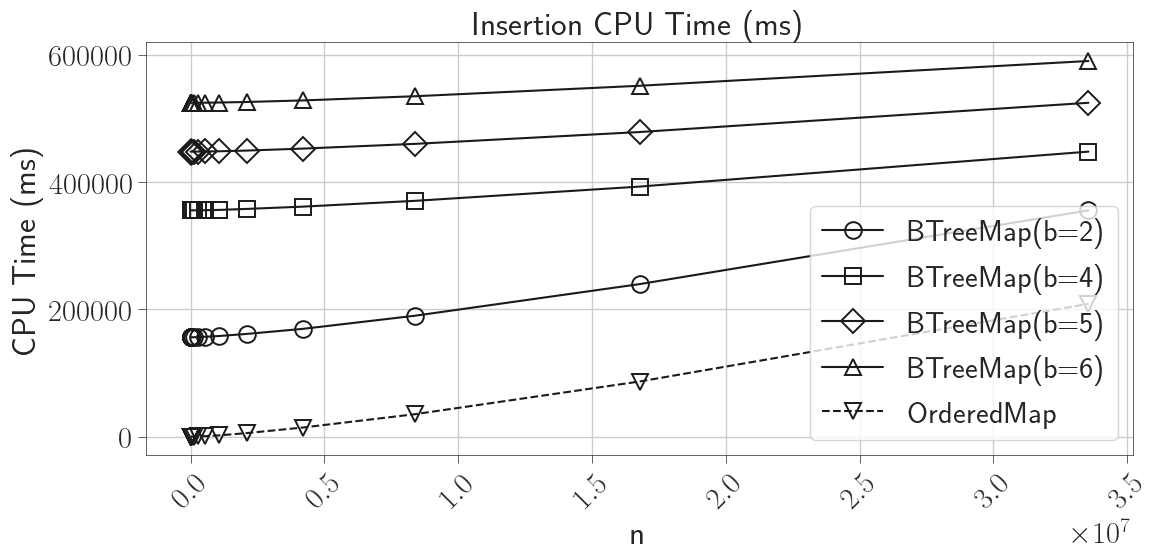

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
om Physical Memory Usage Normalized [0, 1]


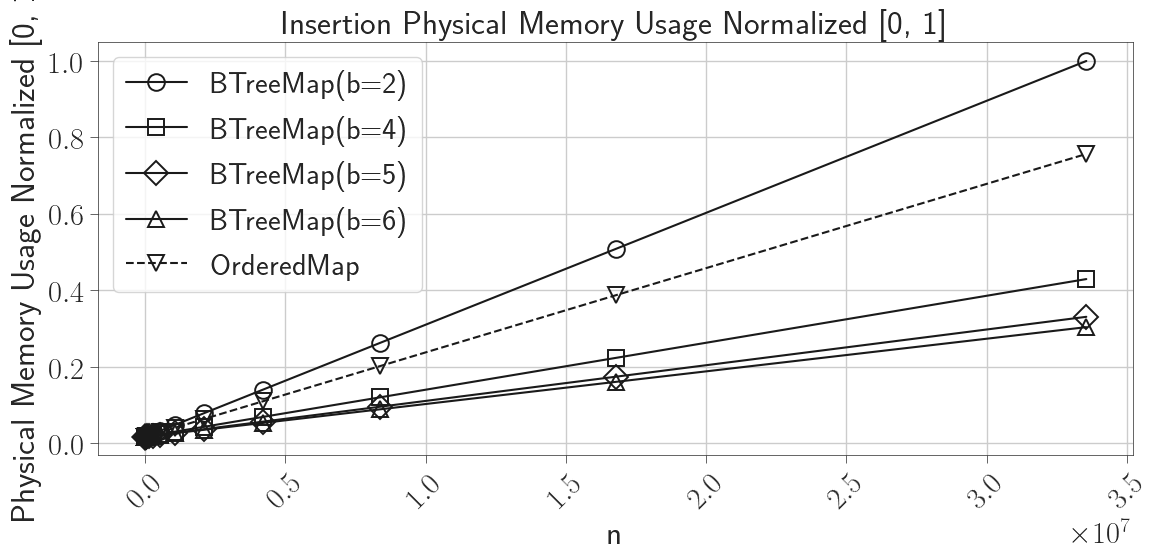

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
om Physical Memory Usage (KB)


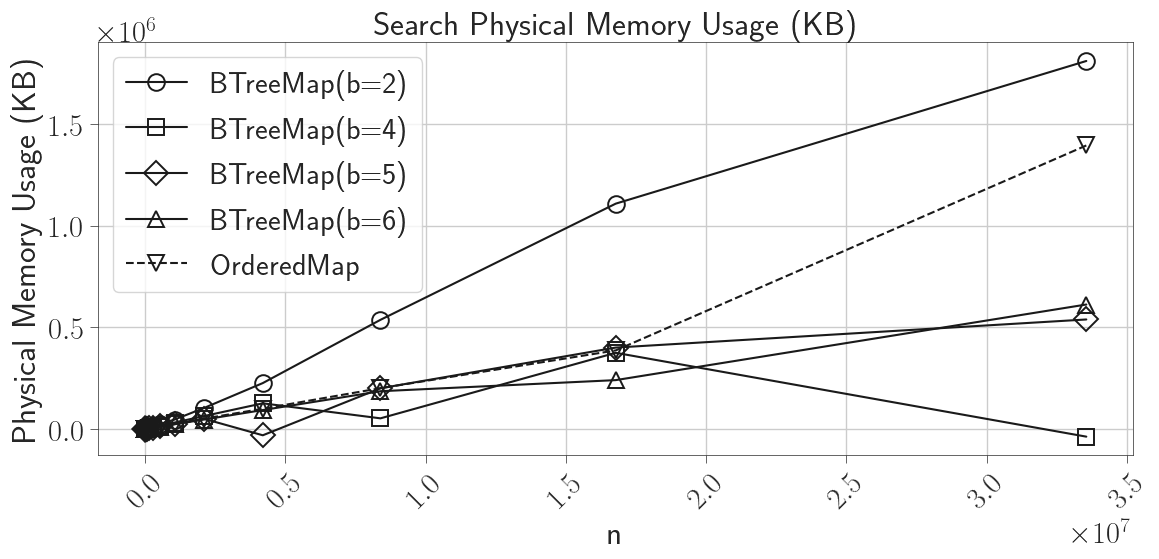

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
om CPU Time (ms)


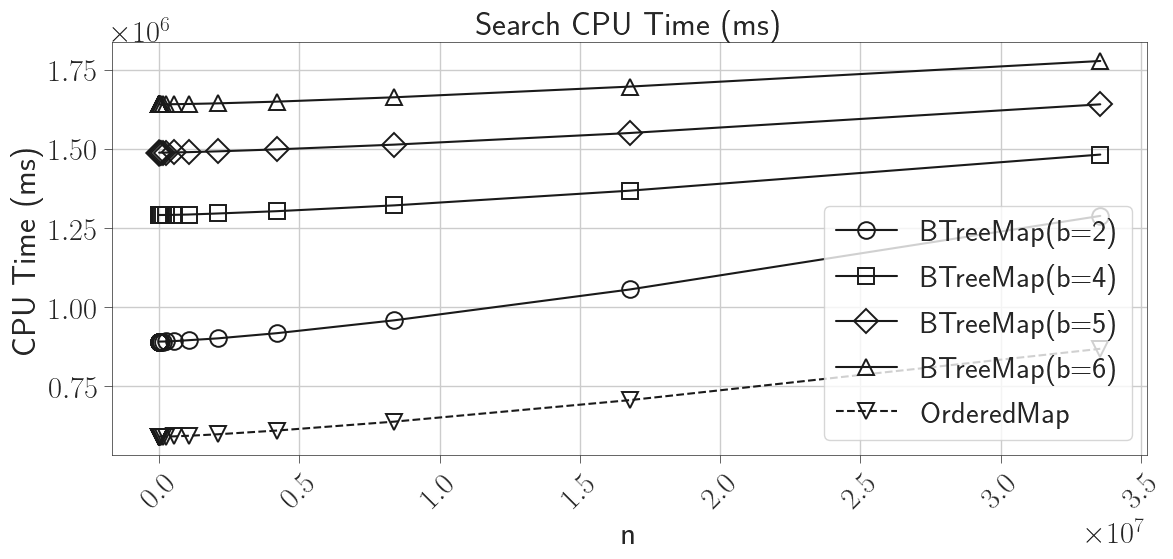

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
om Physical Memory Usage Normalized [0, 1]


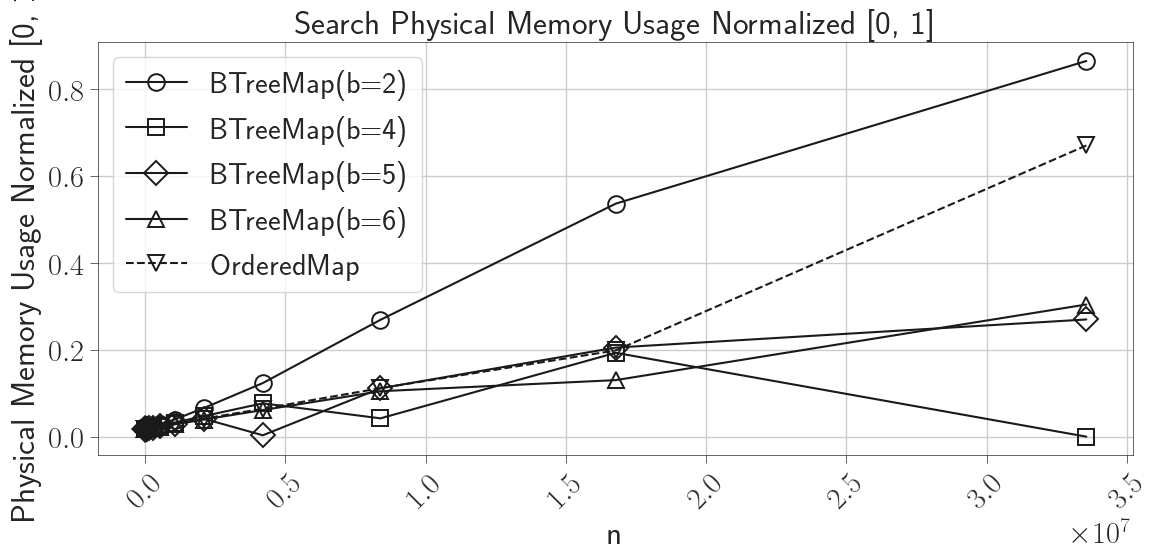

In [446]:
# Get unique names

# Columns to exclude from plotting

# Plot each unique name

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_filtered_btree_op = df_filtered_btree[df_filtered_btree['operation'] == op]
    df_filtered_map_op = df_filtered_map[df_filtered_map['operation'] == op]

    for column in df_filtered_btree.columns:
        if column not in exclude_columns:
            f, ax = plt.subplots(figsize=(12, 6))

            marker_cyc = itertools.cycle(markers)

            for b in df_filtered_btree_op['b'].unique():
                print(f'bt {column}')
                sns.lineplot(
                    data=df_filtered_btree_op[df_filtered_btree_op['b'] == b],
                    x='n',
                    y=column,
                    marker=next(marker_cyc),
                    markerfacecolor='none',
                    markeredgecolor='k',
                    markeredgewidth=1.4,
                    markersize=12,
                    color='k',
                    linewidth=1.5,
                    label= f'BTreeMap(b={int(b)})',
                    ax=ax
                )

            print(f'om {column}')
            sns.lineplot(
                data=df_filtered_map_op,
                x='n',
                y=column,
                marker=next(marker_cyc),
                markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=12,
                color='k',
                linewidth=1.5,
                label='OrderedMap',
                ax=ax
            )

            ax.set_title(f"{op.title()} {column}")
            ax.set_xlabel('n')
            ax.set_ylabel(column)
            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)


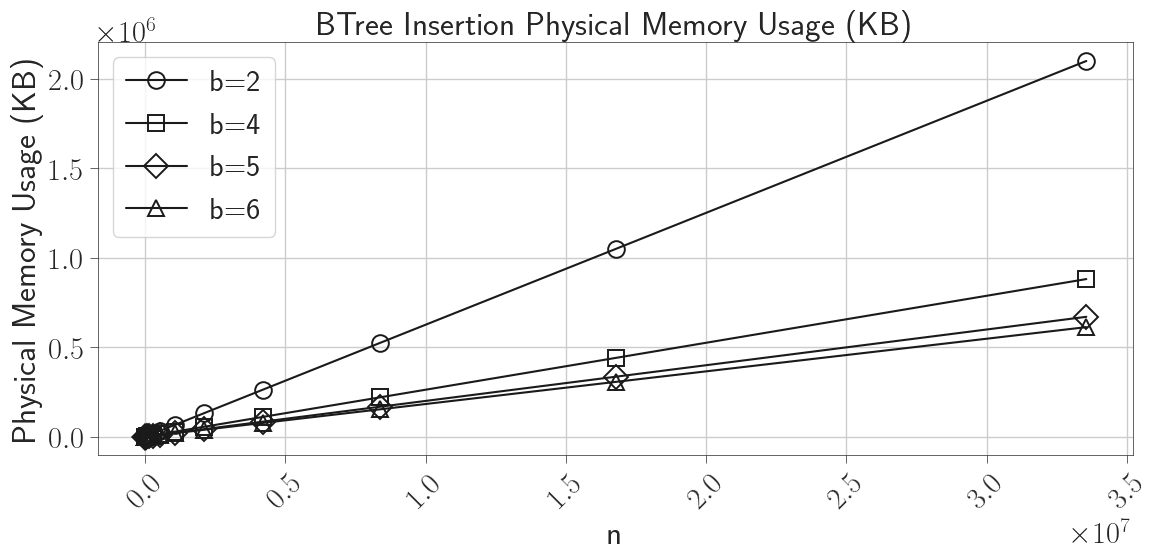

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)


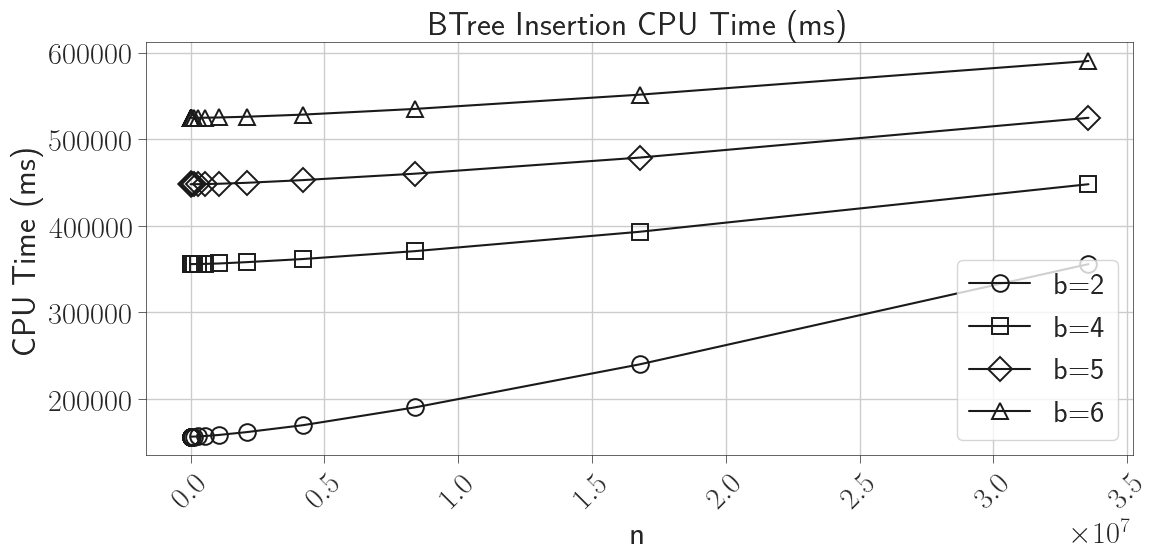

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]


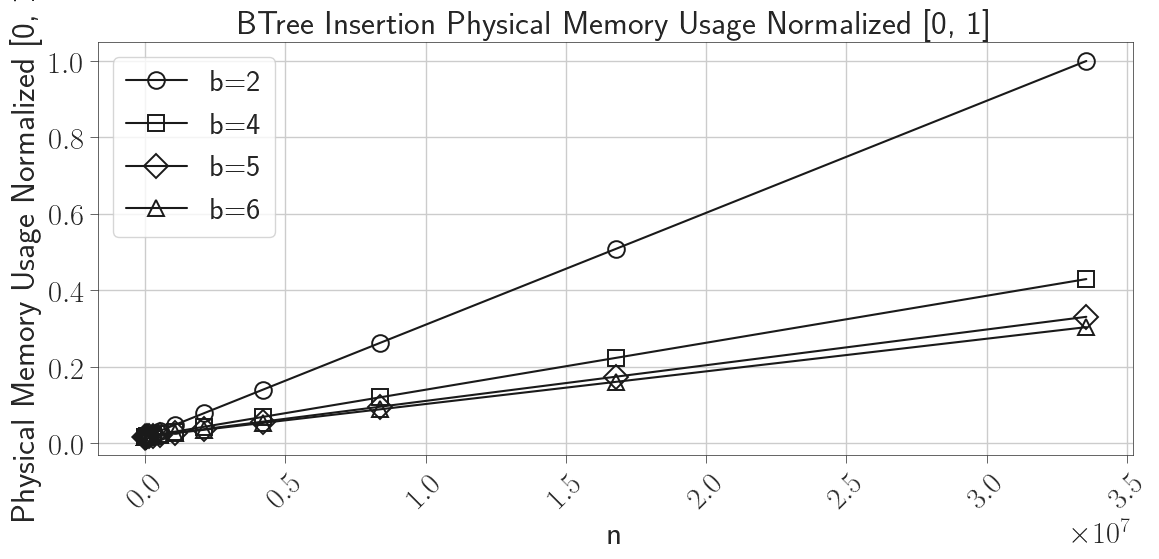

bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)
bt Physical Memory Usage (KB)


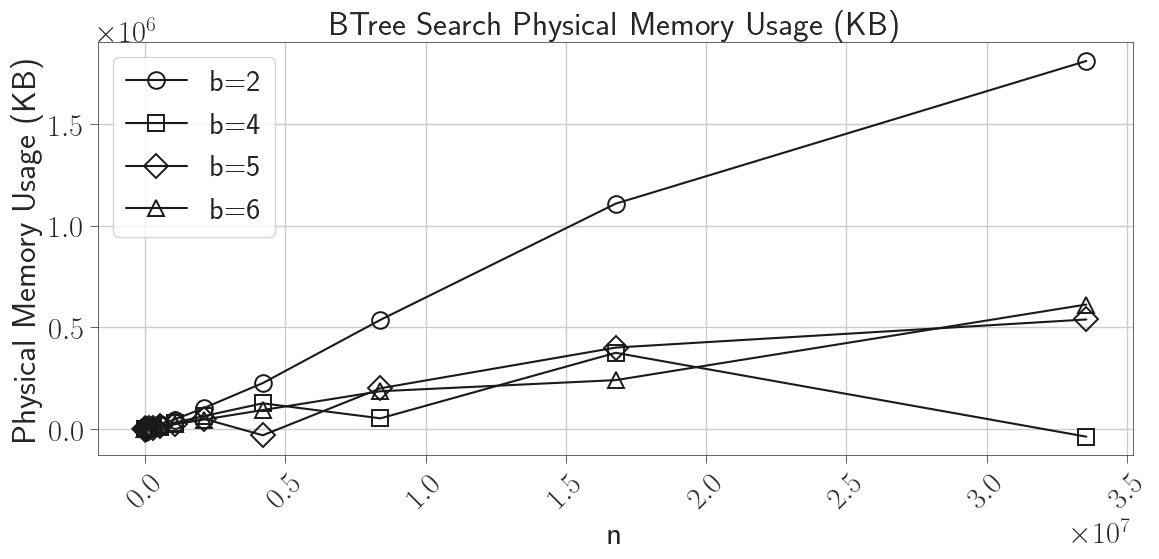

bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)
bt CPU Time (ms)


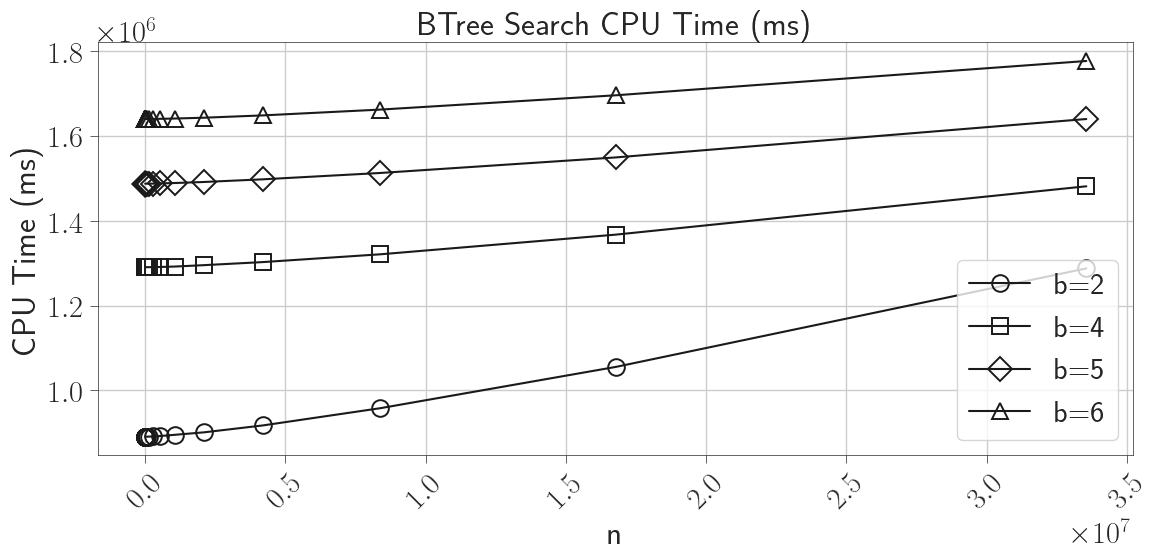

bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]
bt Physical Memory Usage Normalized [0, 1]


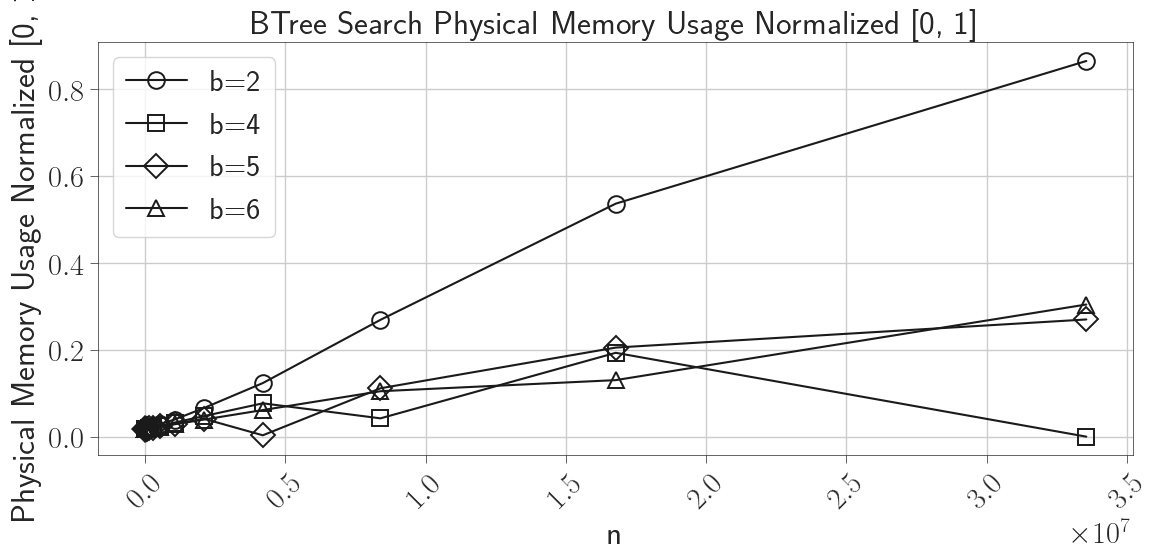

In [447]:
# Get unique names

# Columns to exclude from plotting

# Plot each unique name

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', 'x', 'X', 'd', '|', '_']

for op in operations:

    df_filtered_btree_op = df_filtered_btree[df_filtered_btree['operation'] == op]
    df_filtered_map_op = df_filtered_map[df_filtered_map['operation'] == op]

    for column in df_filtered_btree.columns:
        if column not in exclude_columns:
            f, ax = plt.subplots(figsize=(12, 6))

            marker_cyc = itertools.cycle(markers)

            for b in df_filtered_btree_op['b'].unique():
                print(f'bt {column}')
                sns.lineplot(
                    data=df_filtered_btree_op[df_filtered_btree_op['b'] == b],
                    x='n',
                    y=column,
                    marker=next(marker_cyc),
                    markerfacecolor='none',
                    markeredgecolor='k',
                    markeredgewidth=1.4,
                    markersize=12,
                    color='k',
                    linewidth=1.5,
                    label= f'b={int(b)}',
                    ax=ax
                )

            ax.set_title(f"BTree {op.title()} {column}")
            ax.set_xlabel('n')
            ax.set_ylabel(column)
            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()